In [ ]:
%%bash

pip install opencv-python

In [ ]:
%%bash

pip install ultralytics

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
def detect_edges_and_bboxes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

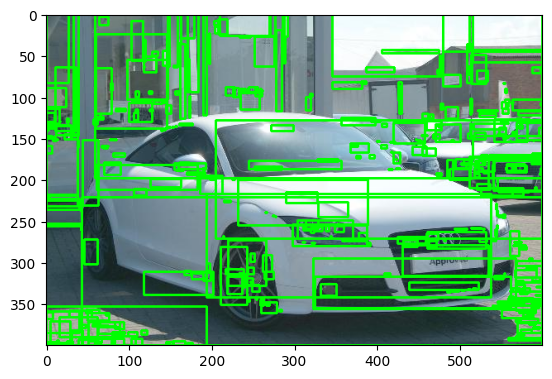

In [4]:
# Test on an image
detect_edges_and_bboxes(f"/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg")

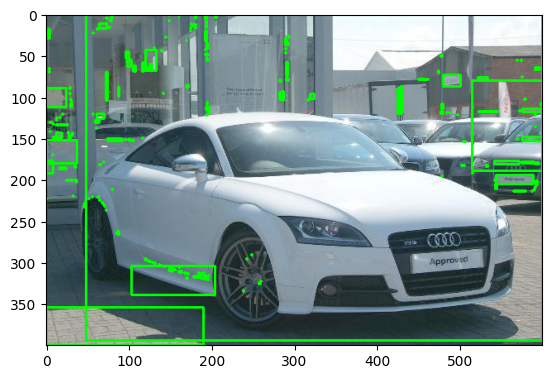

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_segmentation_bboxes(image_path, k=2):
    # Load the image
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Reshape the image for clustering
    pixel_values = img_hsv.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Apply K-Means clustering
    _, labels, centers = cv2.kmeans(pixel_values, k, None, 
                                    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
                                    attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
    labels = labels.flatten()

    # Reshape labels back to image dimensions
    segmented_image = labels.reshape(img.shape[:2])

    # Threshold to identify the largest cluster
    largest_cluster = np.argmax(np.bincount(labels))
    mask = (segmented_image == largest_cluster).astype(np.uint8) * 255

    # Find contours and create bounding boxes
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Test on an image
color_segmentation_bboxes(f"/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg")

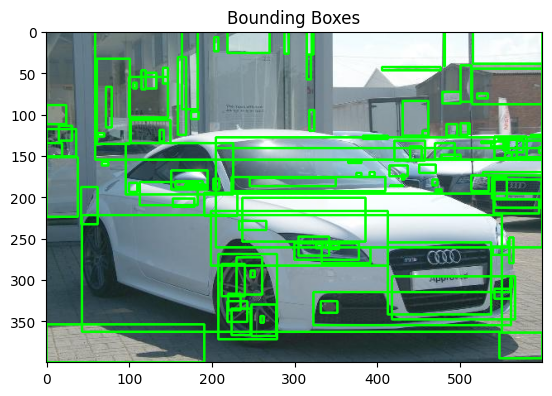

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def alternative_saliency_detection_bboxes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

    # Find contours from edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Boxes")
    plt.show()

# Test on an image
alternative_saliency_detection_bboxes("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg")

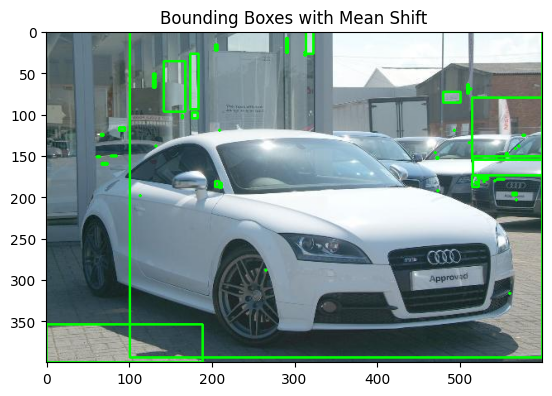

In [7]:
def mean_shift_bboxes(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Apply Mean Shift Filtering
    shifted = cv2.pyrMeanShiftFiltering(img, sp=21, sr=51)

    # Convert to grayscale and apply threshold
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Boxes with Mean Shift")
    plt.show()

# Test on an image
mean_shift_bboxes("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg")

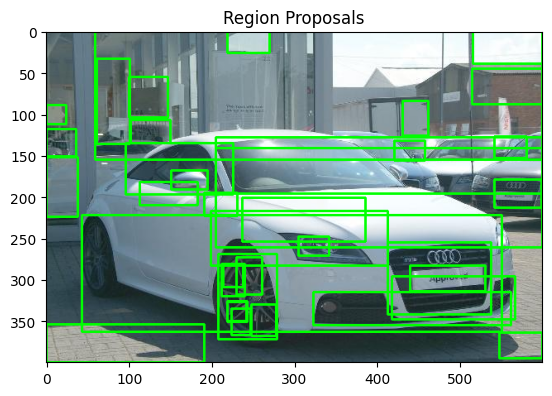

In [8]:
import cv2
import matplotlib.pyplot as plt

def custom_region_proposals(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

    # Find contours
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:  # Ignore small regions
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Region Proposals")
    plt.show()

# Test on an image
custom_region_proposals("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg")

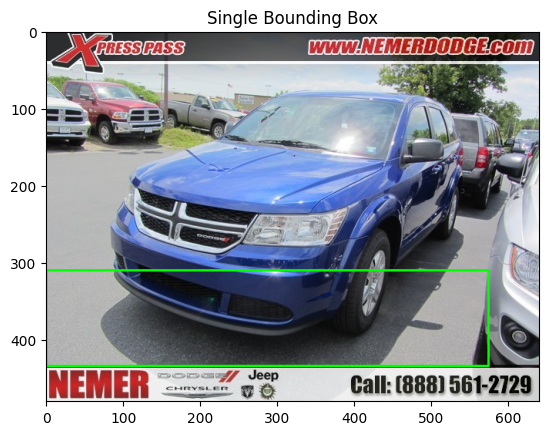

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_single_bbox(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize variables to store the largest bounding box
    largest_bbox = None
    largest_area = 0

    # Loop through all contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h

        # Update largest_bbox if a larger bounding box is found
        if area > largest_area:
            largest_area = area
            largest_bbox = (x, y, x + w, y + h)

    # Draw the largest bounding box
    if largest_bbox:
        x1, y1, x2, y2 = largest_bbox
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Single Bounding Box")
    plt.show()

# Test on an image
get_single_bbox("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00007.jpg")

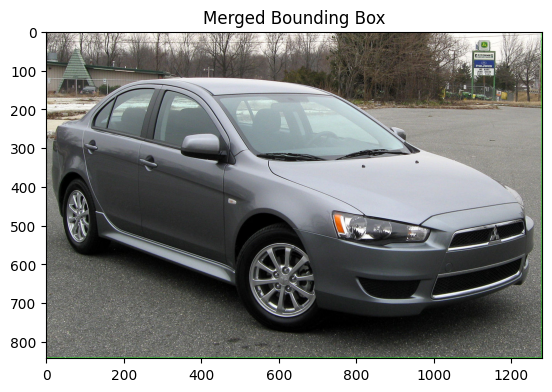

In [10]:
def merge_bounding_boxes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a list to store bounding boxes
    bboxes = []

    # Extract bounding boxes from contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w * h > 500:  # Filter out very small boxes
            bboxes.append([x, y, x + w, y + h])

    # Merge overlapping bounding boxes
    if len(bboxes) > 0:
        bboxes = np.array(bboxes)
        x1 = np.min(bboxes[:, 0])
        y1 = np.min(bboxes[:, 1])
        x2 = np.max(bboxes[:, 2])
        y2 = np.max(bboxes[:, 3])
        merged_bbox = [x1, y1, x2, y2]

        # Draw the merged bounding box
        cv2.rectangle(img, (merged_bbox[0], merged_bbox[1]), (merged_bbox[2], merged_bbox[3]), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Merged Bounding Box")
    plt.show()

# Test on an image
merge_bounding_boxes("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00009.jpg")

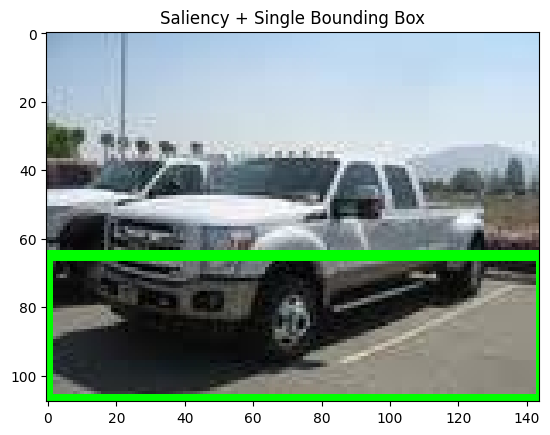

In [11]:
def saliency_single_bbox(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Convert to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Use Canny Edge Detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize variables to store the largest bounding box
    largest_bbox = None
    largest_area = 0

    # Loop through all contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h

        # Update largest_bbox if a larger bounding box is found
        if area > largest_area:
            largest_area = area
            largest_bbox = (x, y, x + w, y + h)

    # Draw the largest bounding box
    if largest_bbox:
        x1, y1, x2, y2 = largest_bbox
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Saliency + Single Bounding Box")
    plt.show()

# Test on an image
saliency_single_bbox("/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00005.jpg")

In [12]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano (lightweight version)

# Perform inference on an image
results = model.predict(source="/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg", classes=[2])  # Class 2 is for cars in COCO dataset


image 1/1 /home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00001.jpg: 448x640 7 cars, 44.8ms
Speed: 3.6ms preprocess, 44.8ms inference, 148.3ms postprocess per image at shape (1, 3, 448, 640)


In [13]:
results = model.predict(source="/home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00007.jpg", classes=[2], save=True)

# The output will be saved in the "runs/predict/" directory by default.


image 1/1 /home/jupyter/advanced_cv_project/kaggle_data/extracted_images/train/cars_train/00007.jpg: 480x640 5 cars, 43.3ms
Speed: 1.8ms preprocess, 43.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
